<a href="https://colab.research.google.com/github/GuysBarash/MLBook/blob/main/ex_2_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

#Exercise 2.3.1

Parameters of the parabola

$f(x) = a*(x^2) + b*x + c$

In [2]:
a = 1
b = -2
c = -3

In [3]:
x_range = -5, 5

Define the $f$ fuction

In [4]:
def f(x):
    v = (a * (x ** 2)) + (b * x) + c
    return v

# visualize parabola $f(x) = a*(x^2) + b*x + c$

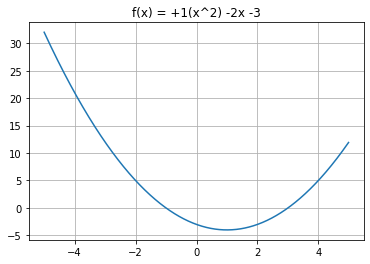

In [5]:
Xi = np.arange(x_range[0], x_range[1], 0.01)
y = np.array(list(map(f, Xi)))
plt.title(f'f(x) = {a:+}(x^2) {b:+}x {c:+}')
plt.plot(Xi, y)
plt.grid()
plt.show()

# Now we fit a Linear regression

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
# Generate D (the data, marked as X)
D_size = 100  # Number of samples
X = np.random.uniform(x_range[0], x_range[1], D_size)
y = list(map(f, X))

Define $g()$ as the function of the linear regression

In [8]:
d, e = np.polyfit(X, y, 1)

def g(x):
    return (d * x) + e


print(f"Model: g(x) = {d:>.3f}x + {e:>.3f}")

Model: g(x) = -1.759x + 6.694


In [9]:
yhat = np.array(list(map(g, X)))
y = np.array(list(map(f, X)))
train_mse = mean_squared_error(y, yhat)
print(f"Train Mean Square Error: {train_mse:>.3f}")

Train Mean Square Error: 63.366


#Visualize just $g()$

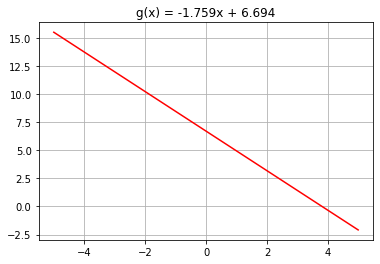

In [10]:
yhat = np.array(list(map(g, Xi)))
plt.title(f'g(x) = {d:>.3f}x + {e:>.3f}')
plt.plot(Xi, yhat, color='r')
plt.grid()
plt.show()

In [11]:
yhat = np.array(list(map(g, Xi)))
y = np.array(list(map(f, Xi)))

#Overlap $f()$ and $g()$

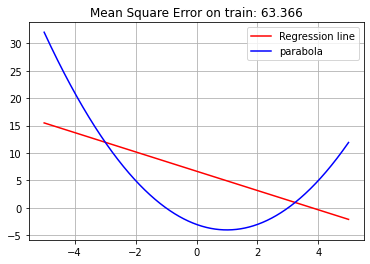

In [12]:
plt.title(f'Mean Square Error on train: {train_mse:>.3f}')
plt.plot(Xi, yhat, color='r', label='Regression line')
plt.plot(Xi, y, color='b', label='parabola')
plt.grid()
plt.legend()
plt.show()

# Re-define $g$ as a function of $x$,$x^2$

$g'(x) = g(x,x^2) = a *(x^2) + b*(x) + c$

In [13]:
# Generate D (the data, marked as X)
D_size = 5
Xi = np.random.uniform(x_range[0], x_range[1], D_size)
X = np.zeros((D_size, 2))
X[:, 0] = Xi
X[:, 1] = Xi ** 2
y = np.array(list(map(f, Xi)))

Train a linear regression of 2 parameters

In [14]:
from sklearn import linear_model

In [15]:
regr = linear_model.LinearRegression()
_  = regr.fit(X, y)

In [16]:
bg, ag = regr.coef_
cg = regr.intercept_

def g(x):
    return (ag * (x ** 2) + bg * x + cg)

In [17]:
Xi = np.arange(x_range[0], x_range[1], 0.01)
yhat = np.array(list(map(g, Xi)))
y = np.array(list(map(f, Xi)))

train_mse = mean_squared_error(y, yhat)
print(f"Train Mean Square Error: {train_mse:>.3f}")

Train Mean Square Error: 0.000


#Visualize the new $g()$

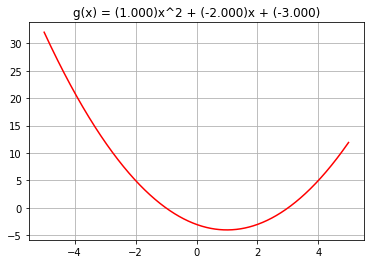

In [18]:
yhat = np.array(list(map(g, Xi)))
plt.title(f'g(x) = ({ag:+>.3f})x^2 + ({bg:+>.3f})x + ({cg:>+.3f})')
plt.plot(Xi, yhat, color='r')
plt.grid()
plt.show()

#Overlap $f()$ and the new  $g()$

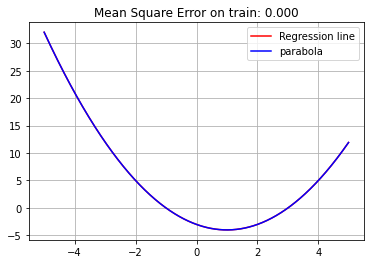

In [19]:
plt.close('all')
plt.title(f'Mean Square Error on train: {train_mse:>.3f}')
plt.plot(Xi, yhat, color='r', label='Regression line')
plt.plot(Xi, y, color='b', label='parabola')
plt.grid()
plt.legend()
plt.show()

# What will happen if we add some noise?

The noise the new and noisy $f$ function

In [20]:
def f(x,noise_mu=0,noise_sigma=1):
    noise = np.random.normal(loc=noise_mu,scale=noise_sigma)
    v = (a * (x ** 2)) + (b * x) + c + noise
    return v

# Plot the noisy function


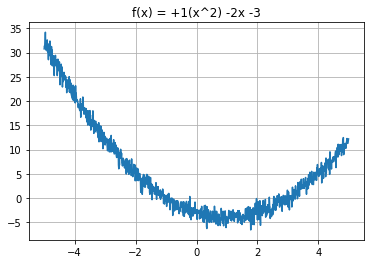

In [21]:
Xi = np.arange(x_range[0], x_range[1], 0.01)
y = np.array(list(map(f, Xi)))
plt.title(f'f(x) = {a:+}(x^2) {b:+}x {c:+}')
plt.plot(Xi, y)
plt.grid()
plt.show()

In [22]:
# Generate D (the data, marked as X)
D_size = 250
Xi = np.random.uniform(x_range[0], x_range[1], D_size)
X = np.zeros((D_size, 2))
X[:, 0] = Xi
X[:, 1] = Xi ** 2
y = np.array(list(map(f, Xi)))



Create a new $g'(x) = g(x,x^2) = a *(x^2) + b*(x) + c$.
Except, now the y label is noisy because of the new $f$ function

In [23]:
regr = linear_model.LinearRegression()
_  = regr.fit(X, y)

bg, ag = regr.coef_
cg = regr.intercept_

def g(x):
    return (ag * (x ** 2) + bg * x + cg)

# Measure the MSE

In [24]:
Xi = np.arange(x_range[0], x_range[1], 0.01)
yhat = np.array(list(map(g, Xi)))
y = np.array(list(map(f, Xi)))

train_mse = mean_squared_error(y, yhat)
print(f"Train Mean Square Error: {train_mse:>.3f}")

Train Mean Square Error: 1.045


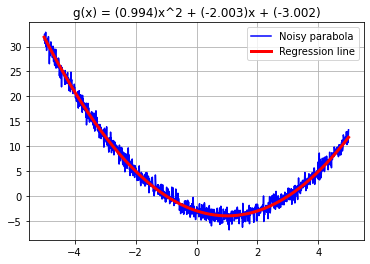

In [25]:
plt.close('all')
# plt.title(f'Mean Square Error on train: {train_mse:>.3f}')
plt.title(f'g(x) = ({ag:+>.3f})x^2 + ({bg:+>.3f})x + ({cg:>+.3f})')
plt.plot(Xi, y, color='b', label='Noisy parabola')
plt.plot(Xi, yhat, color='r', label='Regression line',linewidth=3.0)
plt.grid()
plt.legend()
plt.show()

The resulting regression model is a close match. But the noise causes slight error. 

If we were to increase the size of D, the dataset - the MSE will decrease as well

# Comparing the size of the noisy dataset to the size of the error (MSE)

In [26]:
sizes = 100
bar = range(2,sizes)
measures = [0] * len(bar)
d_sizes = [0] * len(bar)

for idx, D_size in tqdm(enumerate(bar),total=len(bar)):
  repeat = 50
  reps = [0] * repeat
  for repeat_idx in range(repeat):
    # Generate D (the data, marked as X)
    Xi = np.random.uniform(x_range[0], x_range[1], D_size)
    X = np.zeros((D_size, 2))
    X[:, 0] = Xi
    X[:, 1] = Xi ** 2
    y = np.array(list(map(f, Xi)))

    regr = linear_model.LinearRegression()
    _  = regr.fit(X, y)
    bg, ag = regr.coef_
    cg = regr.intercept_

    def g(x):
        return (ag * (x ** 2) + bg * x + cg)

    Xi = np.arange(x_range[0], x_range[1], 0.01)
    yhat = np.array(list(map(g, Xi)))
    y = np.array(list(map(f, Xi)))

    train_mse = mean_squared_error(y, yhat)
    reps[repeat_idx] = train_mse
  train_mse = np.mean(reps)
  d_sizes[idx] = D_size
  measures[idx] = train_mse

100%|██████████| 98/98 [00:52<00:00,  1.87it/s]


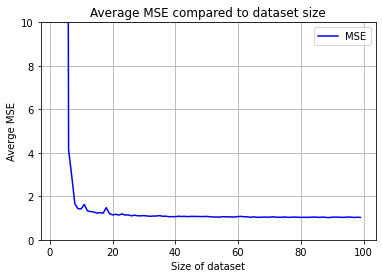

In [27]:
plt.close('all')
plt.title(f'Average MSE compared to dataset size')
plt.plot(d_sizes, measures, color='b', label='MSE')
plt.xlabel('Size of dataset')
plt.ylabel('Averge MSE')
plt.ylim(0,10)
plt.grid()
plt.legend()
plt.show()